# Examples of workflow plots

In [9]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt

### Range to plot, has to be exactly 10

In [10]:
start = 10
stop = 20
output_dir = '../workloads'

In [12]:
plot_data = []

for idx in range(start, stop):
    file_path = os.path.join(output_dir, f'{idx}.csv')
    df = pd.read_csv(file_path)
    plot_data.append(df)

In [27]:
plot_data[4]

,timestamp,power_draw_W,memory_free_MiB,memory_used_MiB,utilization_memory_pct,utilization_gpu_pct,id_user,cpus_req,mem_req,gres_used,nodes_alloc,timelimit,time_submit,time_start,time_end,time_eligible
0,0.0,25.330000,32510.000000,0.000000,0.0,0.000000,87544801505686,20,9223372036854784308,NaN,1,525600,1629219994,1629220007,1629250844,1629219994
1,1.0,27.998000,32437.000000,73.000000,0.0,0.600000,87544801505686,20,9223372036854784308,NaN,1,525600,1629219994,1629220007,1629250844,1629219994
2,2.0,36.426667,8620.777778,23889.222222,0.0,1.777778,87544801505686,20,9223372036854784308,NaN,1,525600,1629219994,1629220007,1629250844,1629219994
3,3.0,36.536000,1921.000000,30589.000000,0.0,0.900000,87544801505686,20,9223372036854784308,NaN,1,525600,1629219994,1629220007,1629250844,1629219994
4,4.0,36.421000,1921.000000,30589.000000,0.0,0.000000,87544801505686,20,9223372036854784308,NaN,1,525600,1629219994,1629220007,1629250844,1629219994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30833,30833.0,35.846000,1405.000000,31105.000000,0.0,0.000000,87544801505686,20,9223372036854784308,NaN,1,525600,1629219994,1629220007,1629250844,1629219994
30834,30834.0,35.916667,1458.555556,31051.444444,0.0,0.666667,87544801505686,20,9223372036854784308,NaN,1,525600,1629219994,1629220007,1629250844,1629219994
30835,30835.0,35.902000,1852.000000,30658.000000,0.0,0.900000,87544801505686,20,9223372036854784308,NaN,1,525600,1629219994,1629220007,1629250844,1629219994
30836,30836.0,35.861000,1865.000000,30645.000000,0.0,0.000000,87544801505686,20,9223372036854784308,NaN,1,525600,1629219994,1629220007,1629250844,1629219994


## Power usage

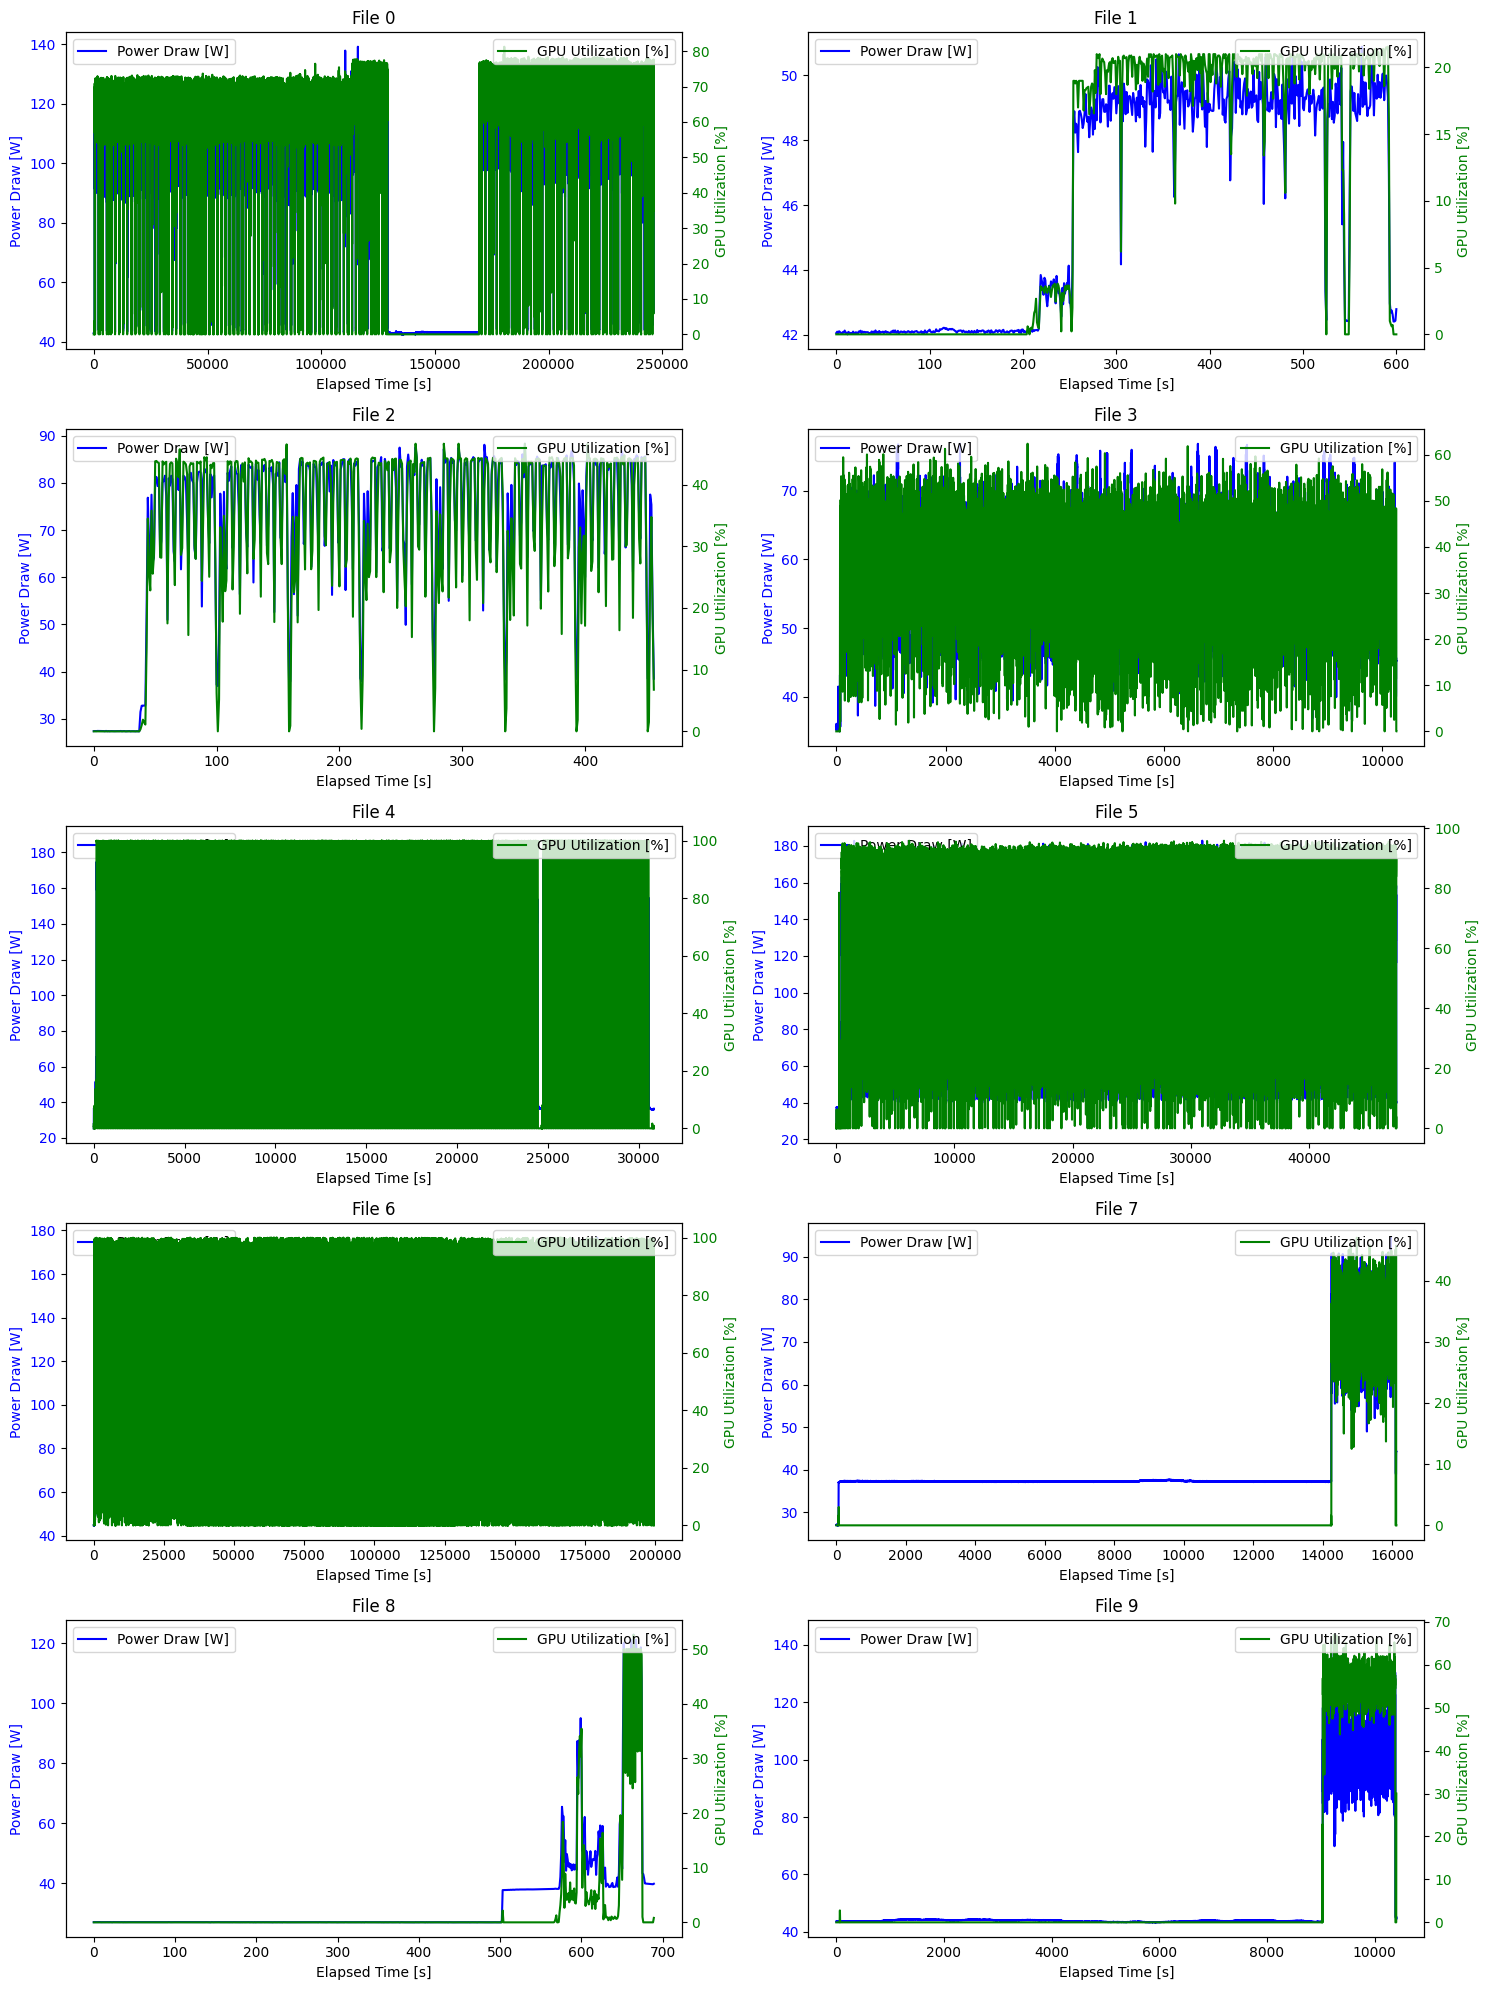

In [20]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 20))
axes = axes.flatten()

for idx, (ax, df) in enumerate(zip(axes, plot_data)):
    # Plot power drawn on the primary y-axis
    ax.plot(df['timestamp'], df['power_draw_W'], color='blue', label='Power Draw [W]')
    ax.set_ylabel('Power Draw [W]', color='blue')
    ax.tick_params(axis='y', labelcolor='blue')
    
    # Create a twin y-axis for utilization percentage
    ax2 = ax.twinx()
    ax2.plot(df['timestamp'], df['utilization_gpu_pct'], color='green', label='GPU Utilization [%]')
    ax2.set_ylabel('GPU Utilization [%]', color='green')
    ax2.tick_params(axis='y', labelcolor='green')

    # Add a title and x-axis label
    ax.set_title(f'File {idx}')
    ax.set_xlabel('Elapsed Time [s]')
    
    # Add legends
    ax.legend(loc='upper left')
    ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()


## Memory 

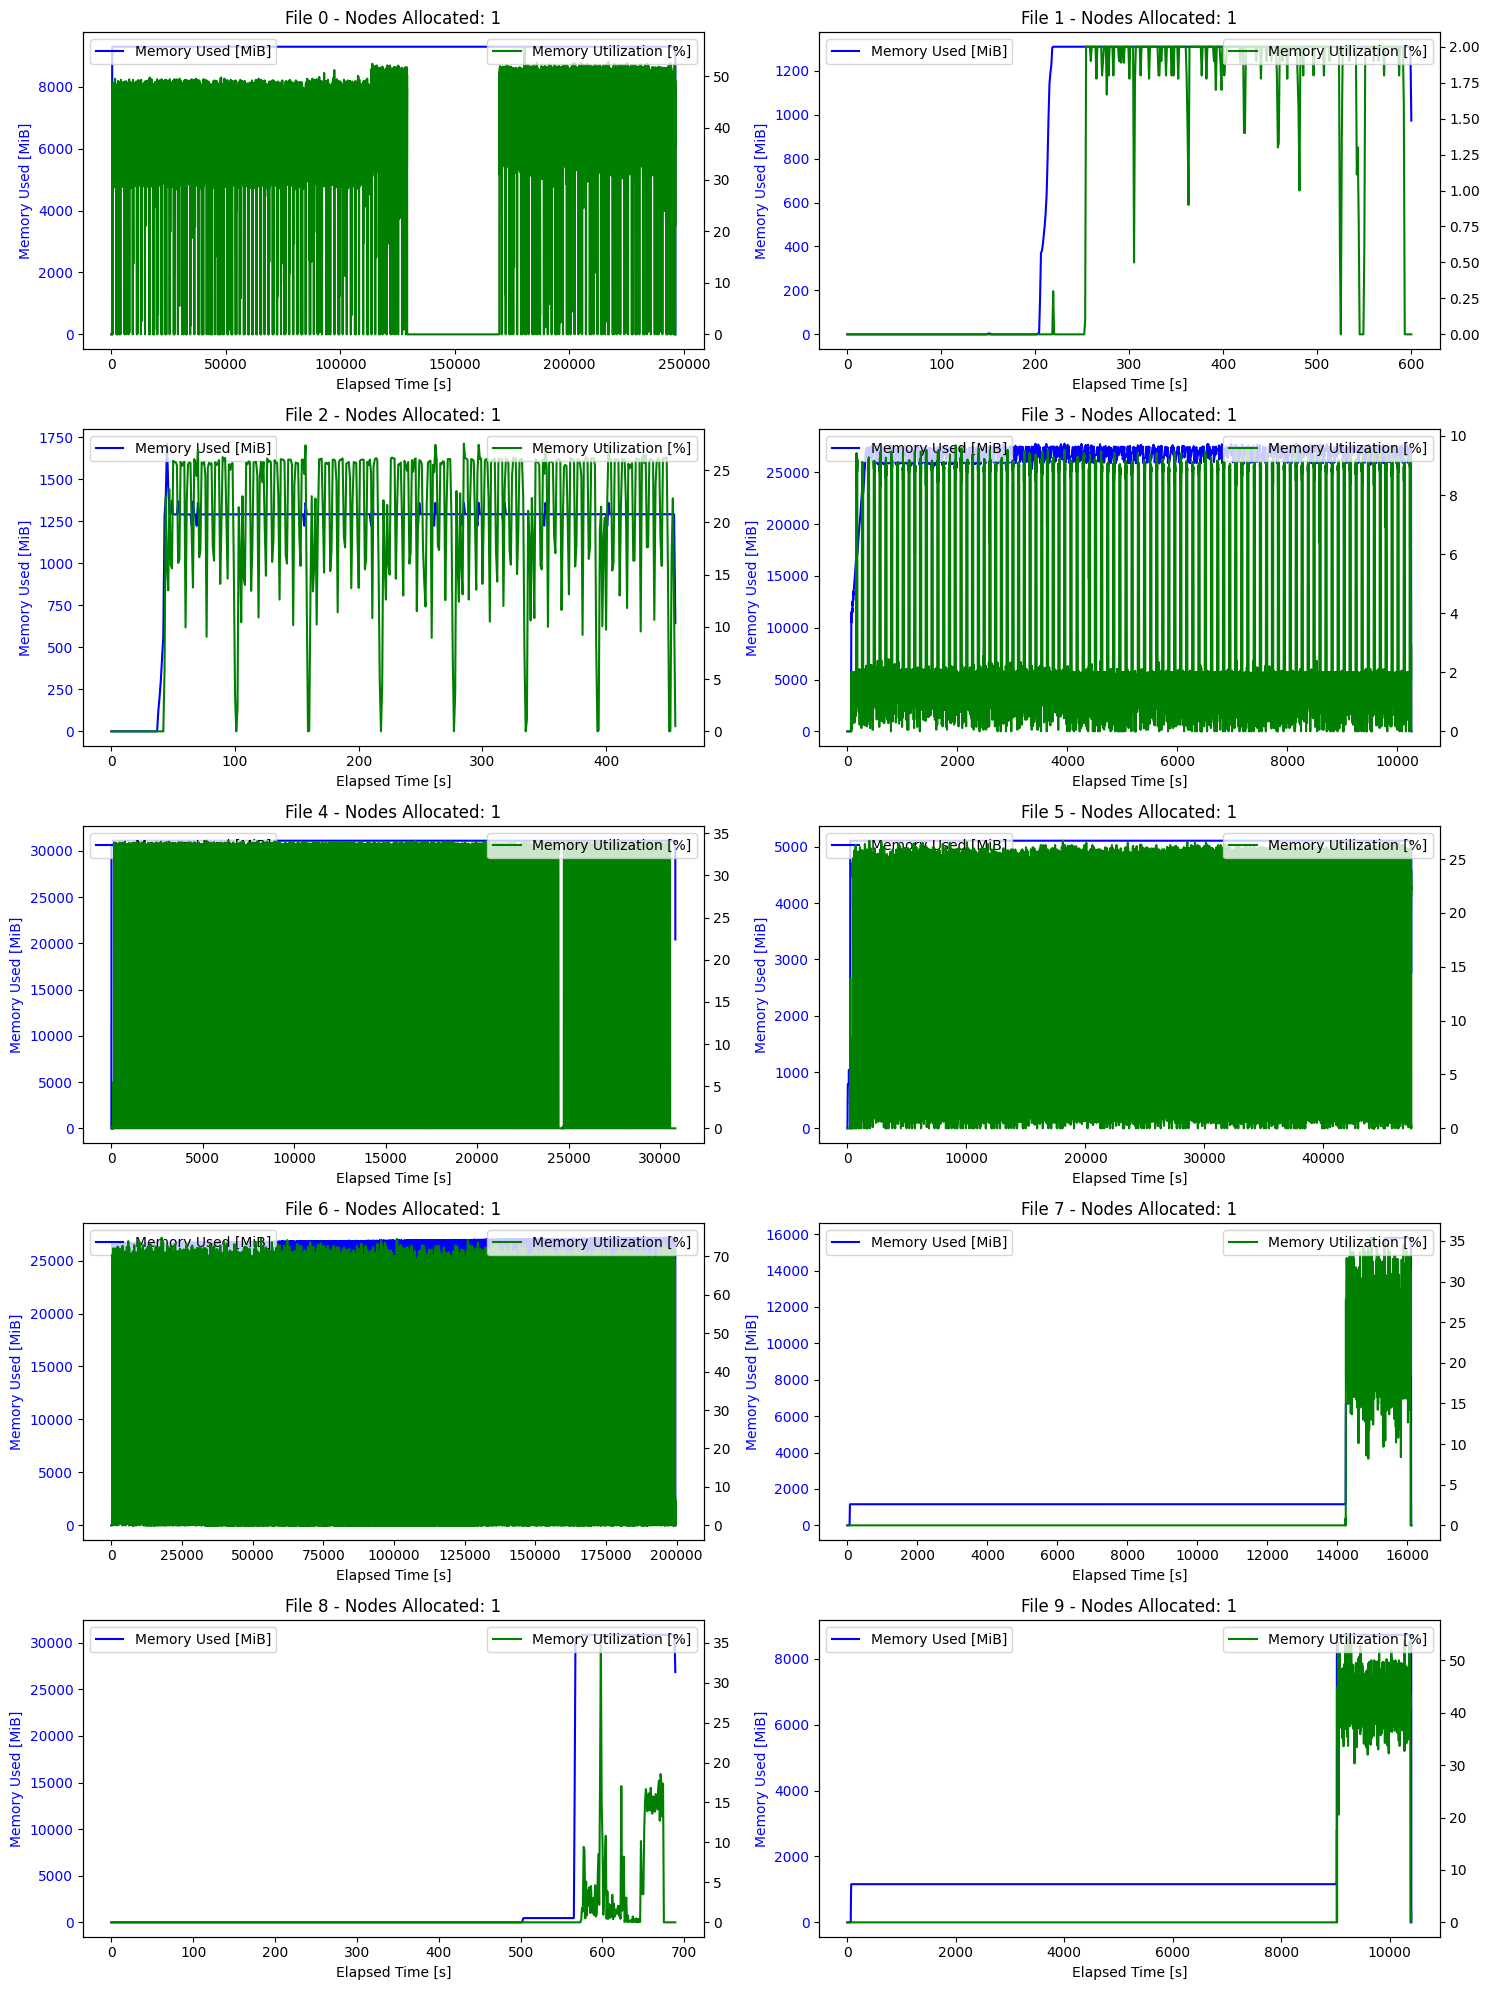

In [26]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 20))
axes = axes.flatten()

for idx, (ax, df) in enumerate(zip(axes, plot_data)):
    # Plot memory used on the primary y-axis
    ax.plot(df['timestamp'], df['memory_used_MiB'], color='blue', label='Memory Used [MiB]')
    ax.set_ylabel('Memory Used [MiB]', color='blue')
    ax.tick_params(axis='y', labelcolor='blue')
    
    # Create a twin y-axis for utilization and nodes allocated
    ax2 = ax.twinx()
    
    # Plot utilization memory percentage
    ax2.plot(df['timestamp'], df['utilization_memory_pct'], color='green', label='Memory Utilization [%]')
    
    # Add title and include nodes_alloc
    nodes_alloc = df['nodes_alloc'].max()  # You can use max, mean, or other stats
    ax.set_title(f'File {idx} - Nodes Allocated: {nodes_alloc}')
    ax.set_xlabel('Elapsed Time [s]')
    
    # Add legends for both y-axes
    ax.legend(loc='upper left')
    ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()
